# Calculations for PV CdTe installs, CdTe Market Share

This journal documents the manipulation of CdTe PV installation data for US installs. This covers selection of data, and weighting by marketshare.

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")

plt.rcParams.update({'font.size': 28})
plt.rcParams['figure.figsize'] = (30, 15)

cwd = os.getcwd() #grabs current working directory

supportMatfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
baselinesFolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines')

#### Load new PV capacity generated from 2001 to 2021 by [eia](https://www.eia.gov/electricity/data/eia860/)

I downloaded the 2021 zip file and filtered for Thin Film (CdTe).

In [3]:
df_cdte_installs = pd.read_excel(os.path.join(supportMatfolder, 'RELOG_PV_ICE.xlsx'), sheet_name='CdTe Capacity from eia')

In [4]:
df_cdte_installs.columns

Index(['CdTe New Installs Capacity (MW)', 'Cummulative Capacity (MW)',
       'Operating Year'],
      dtype='object')

In [5]:
df_cdte_installs_total = df_cdte_installs.drop(['Cummulative Capacity (MW)'], axis=1)
df_cdte_installs_total

,CdTe New Installs Capacity (MW),Operating Year
0,3.7,2001
1,1.0,2008
2,10.0,2008
3,1.6,2009
4,21.0,2009
...,...,...
519,20.0,2021
520,27.4,2021
521,140.6,2021
522,107.0,2021


Group by year.

In [6]:
df_cdte_installs_total_grouped = df_cdte_installs_total.groupby('Operating Year').sum()
df_cdte_installs_total_grouped

,CdTe New Installs Capacity (MW)
Operating Year,
2001,3.7
2008,11.0
2009,28.6
2010,117.8
2011,84.6
2012,498.5
2013,1182.8
2014,1351.0
2015,908.2


Insert the years that don't have new capacity instlled.

In [7]:
dict_missing = {'years' : list(range(2002,2008)), 'CdTe New Installs Capacity (MW)':[0, 0, 0, 0, 0, 0]}
missing_years = pd.DataFrame(dict_missing).set_index('years')
df_cdte_installs_total_grouped = pd.concat([df_cdte_installs_total_grouped, missing_years]).sort_index()
df_cdte_installs_total_grouped.columns
df_cdte_installs_total_grouped

,CdTe New Installs Capacity (MW)
2001,3.7
2002,0.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,11.0
2009,28.6
2010,117.8


#### Load US all PV tech dataframe

In [8]:
df_us_installs = pd.read_csv(os.path.join(supportMatfolder,'output_USA_allPV_installs.csv'), index_col='Year')
df_us_installs;

#### Calculate market share

In [9]:
df_cdte_installs_total_grouped['Total PV US installs (MW)'] = df_us_installs['installed_pv_MW']

In [10]:
df_cdte_installs_total_grouped

,CdTe New Installs Capacity (MW),Total PV US installs (MW)
2001,3.7,29.000
2002,0.0,44.400
2003,0.0,63.000
2004,0.0,100.800
2005,0.0,103.000
2006,0.0,105.000
2007,0.0,347.500
2008,11.0,338.000
2009,28.6,464.500
2010,117.8,848.588


In [11]:
df_cdte_installs_total_grouped['Market share [%]'] = df_cdte_installs_total_grouped['CdTe New Installs Capacity (MW)']/df_cdte_installs_total_grouped['Total PV US installs (MW)']*100
df_cdte_installs_total_grouped

,CdTe New Installs Capacity (MW),Total PV US installs (MW),Market share [%]
2001,3.7,29.000,12.758621
2002,0.0,44.400,0.000000
2003,0.0,63.000,0.000000
2004,0.0,100.800,0.000000
2005,0.0,103.000,0.000000
2006,0.0,105.000,0.000000
2007,0.0,347.500,0.000000
2008,11.0,338.000,3.254438
2009,28.6,464.500,6.157158
2010,117.8,848.588,13.881884


#### Import Si installs and market share

In [12]:
si_installs_us = pd.read_csv(os.path.join(supportMatfolder,'output_USA_SiPV_installs.csv'), index_col='Year')
si_installs_us;

In [13]:
df_cdte_installs_total_grouped.loc[2009:2021]['CdTe New Installs Capacity (MW)']

2009      28.6
2010     117.8
2011      84.6
2012     498.5
2013    1182.8
2014    1351.0
2015     908.2
2016    1508.7
2017     823.1
2018     878.0
2019    1762.6
2020    2489.5
2021    3801.0
Name: CdTe New Installs Capacity (MW), dtype: float64

In [14]:
df_cdte_installs_total_grouped.describe()

,CdTe New Installs Capacity (MW),Total PV US installs (MW),Market share [%]
count,21.000000,21.000000,21.000000
mean,735.671429,5677.383429,8.653367
std,1010.707545,7158.363468,7.497783
min,0.000000,29.000000,0.000000
25%,0.000000,105.000000,0.000000
50%,117.800000,1920.510000,8.174757
75%,1182.800000,10740.380000,13.167587
max,3801.000000,23565.000000,24.818488


In [15]:
si_installs_us_baseline = pd.read_csv(os.path.join(baselinesFolder,'baseline_modules_mass_US.csv'), index_col='year')
si_installs_us_baseline = si_installs_us_baseline.iloc[1: , :]
si_installs_us_baseline['new_Installed_Capacity_[MW]'] = si_installs_us_baseline['new_Installed_Capacity_[MW]'].astype(float)
si_installs_us_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 1995 to 2050
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_Installed_Capacity_[MW]  56 non-null     float64
 1   mod_eff                      56 non-null     object 
 2   mod_reliability_t50          56 non-null     object 
 3   mod_reliability_t90          56 non-null     object 
 4   mod_degradation              56 non-null     object 
 5   mod_lifetime                 56 non-null     object 
 6   mod_MFG_eff                  56 non-null     object 
 7   mod_Repair                   56 non-null     object 
 8   mod_MerchantTail             56 non-null     object 
 9   mod_EOL_collection_eff       56 non-null     object 
 10  mod_EOL_pg0_resell           56 non-null     object 
 11  mod_EOL_pg1_landfill         56 non-null     object 
 12  mod_EOL_pg2_stored           56 non-null     object 
 13  mod_EOL_pg3_reMFG     

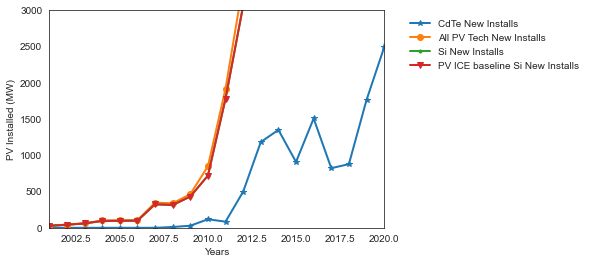

In [23]:
plt.plot(df_cdte_installs_total_grouped.index,df_cdte_installs_total_grouped['CdTe New Installs Capacity (MW)'],lw=2,marker='*', label='CdTe New Installs')
plt.plot(df_cdte_installs_total_grouped.index,df_cdte_installs_total_grouped['Total PV US installs (MW)'],lw=2,marker='o', label='All PV Tech New Installs')
plt.plot(si_installs_us.index,si_installs_us['0'],lw=2,marker='.', label='Si New Installs')
plt.plot(range(1995, 2051), si_installs_us_baseline['new_Installed_Capacity_[MW]'],lw=2,marker='v', label='PV ICE baseline Si New Installs')


# ax = plt.gca()
# ax.set_ylim([-10, 10^5])
#plt.yscale('symlog') # This way we can see the zero values
#plt.ylim(0, 30000)
plt.ylim(0, 3000)
plt.xlim(2001, 2020)
plt.ylabel('PV Installed (MW)')
plt.xlabel('Years')
#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left")
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.plot(df_installs_raw, marker='o')

#### Import Si market share

In [17]:
si_maketshare_us = pd.read_csv(os.path.join(supportMatfolder,'output_USA_Si_marketshare.csv'), index_col='Year')
si_maketshare_us;

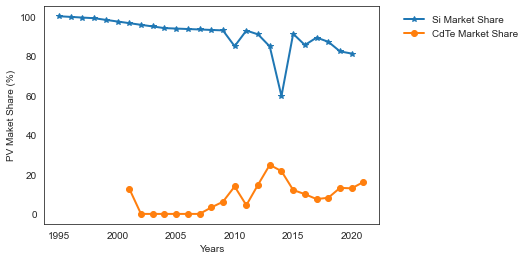

In [18]:
plt.plot(si_maketshare_us.index,si_maketshare_us['All_Marketshare']*100,lw=2,marker='*', label='Si Market Share')
plt.plot(df_cdte_installs_total_grouped.index,df_cdte_installs_total_grouped['Market share [%]'],lw=2,marker='o', label='CdTe Market Share')

# ax = plt.gca()
# ax.set_ylim([-10, 10^5])
#plt.yscale('symlog') # This way we can see the zero values
#plt.ylim(0, 16000)

plt.ylabel('PV Maket Share (%)')
plt.xlabel('Years')
#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left")
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.plot(df_installs_raw, marker='o')

In [19]:
total_share = df_cdte_installs_total_grouped['Market share [%]'] + si_maketshare_us['All_Marketshare']*100

In [20]:
total_share

1995           NaN
1996           NaN
1997           NaN
1998           NaN
1999           NaN
2000           NaN
2001    109.258621
2002     95.666667
2003     94.833333
2004     94.000000
2005     93.768129
2006     93.536259
2007     93.304388
2008     96.326955
2009     98.997805
2010     98.710380
2011     97.160498
2012    105.609586
2013    109.535585
2014     81.250844
2015    103.224881
2016     95.433953
2017     96.704523
2018     95.252956
2019     95.384295
2020     94.072564
2021           NaN
2022           NaN
2023           NaN
2024           NaN
2025           NaN
2026           NaN
2027           NaN
2028           NaN
2029           NaN
2030           NaN
2031           NaN
2032           NaN
2033           NaN
2034           NaN
2035           NaN
2036           NaN
2037           NaN
2038           NaN
2039           NaN
2040           NaN
2041           NaN
2042           NaN
2043           NaN
2044           NaN
2045           NaN
2046           NaN
2047        

### To do:

* Check out with Heather or Silvana why total market shares of Si and CdTe are over 100 in some instances.
* Ask how to do the projection of CdTe over time. Do I assume a % growth of market share of CdTe over time and multiply it by the installed capacity of Solar Futures?